In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cycler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Dark mode for charts
colors = cycler('color', ['#669FEE', '#66EE91', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor='#313233', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors, labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray'),
plt.rc('ytick', direction='out', color='gray'),
plt.rc('legend', facecolor='#313233', edgecolor='#313233')
plt.rc('text', color='#C9C9C9')
plt.rc('figure', facecolor='#313233')

# Data Analysis

In [3]:
df = pd.read_csv('Ecommerce Customers.csv')
df = df.drop(columns=['Email', 'Address', 'Avatar'])
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


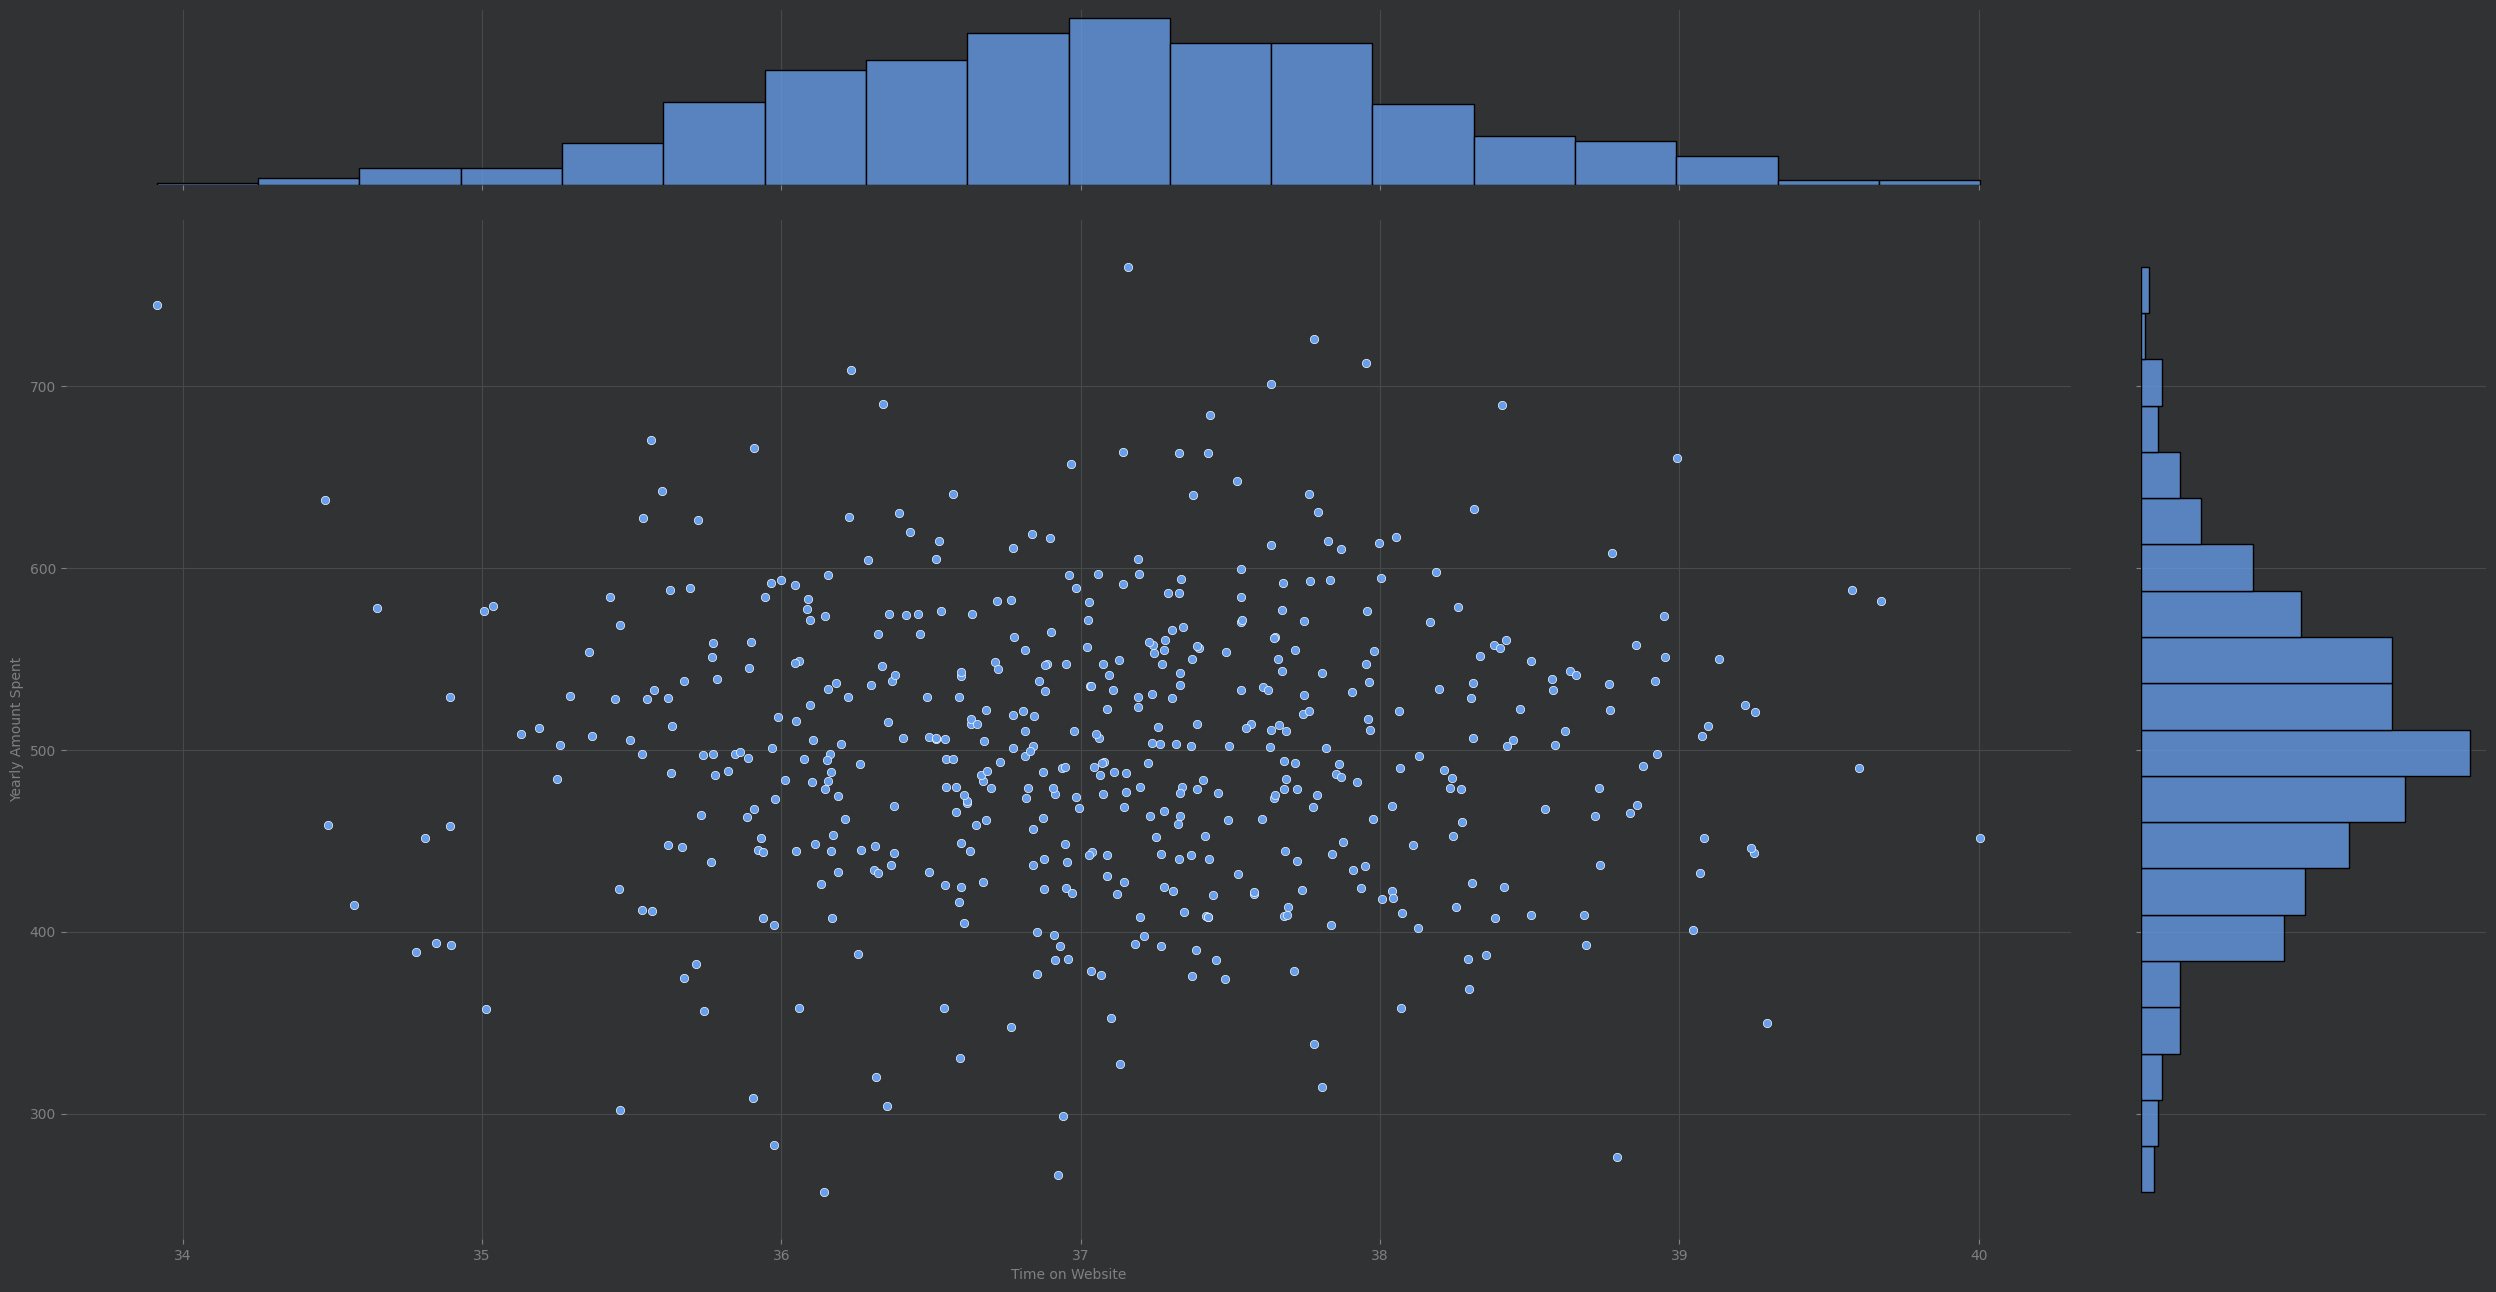

In [5]:
joint_plot = sns.jointplot(x=df['Time on Website'], y=df['Yearly Amount Spent'])
fig = joint_plot.fig
fig.set_size_inches(28, 14)
plt.show()

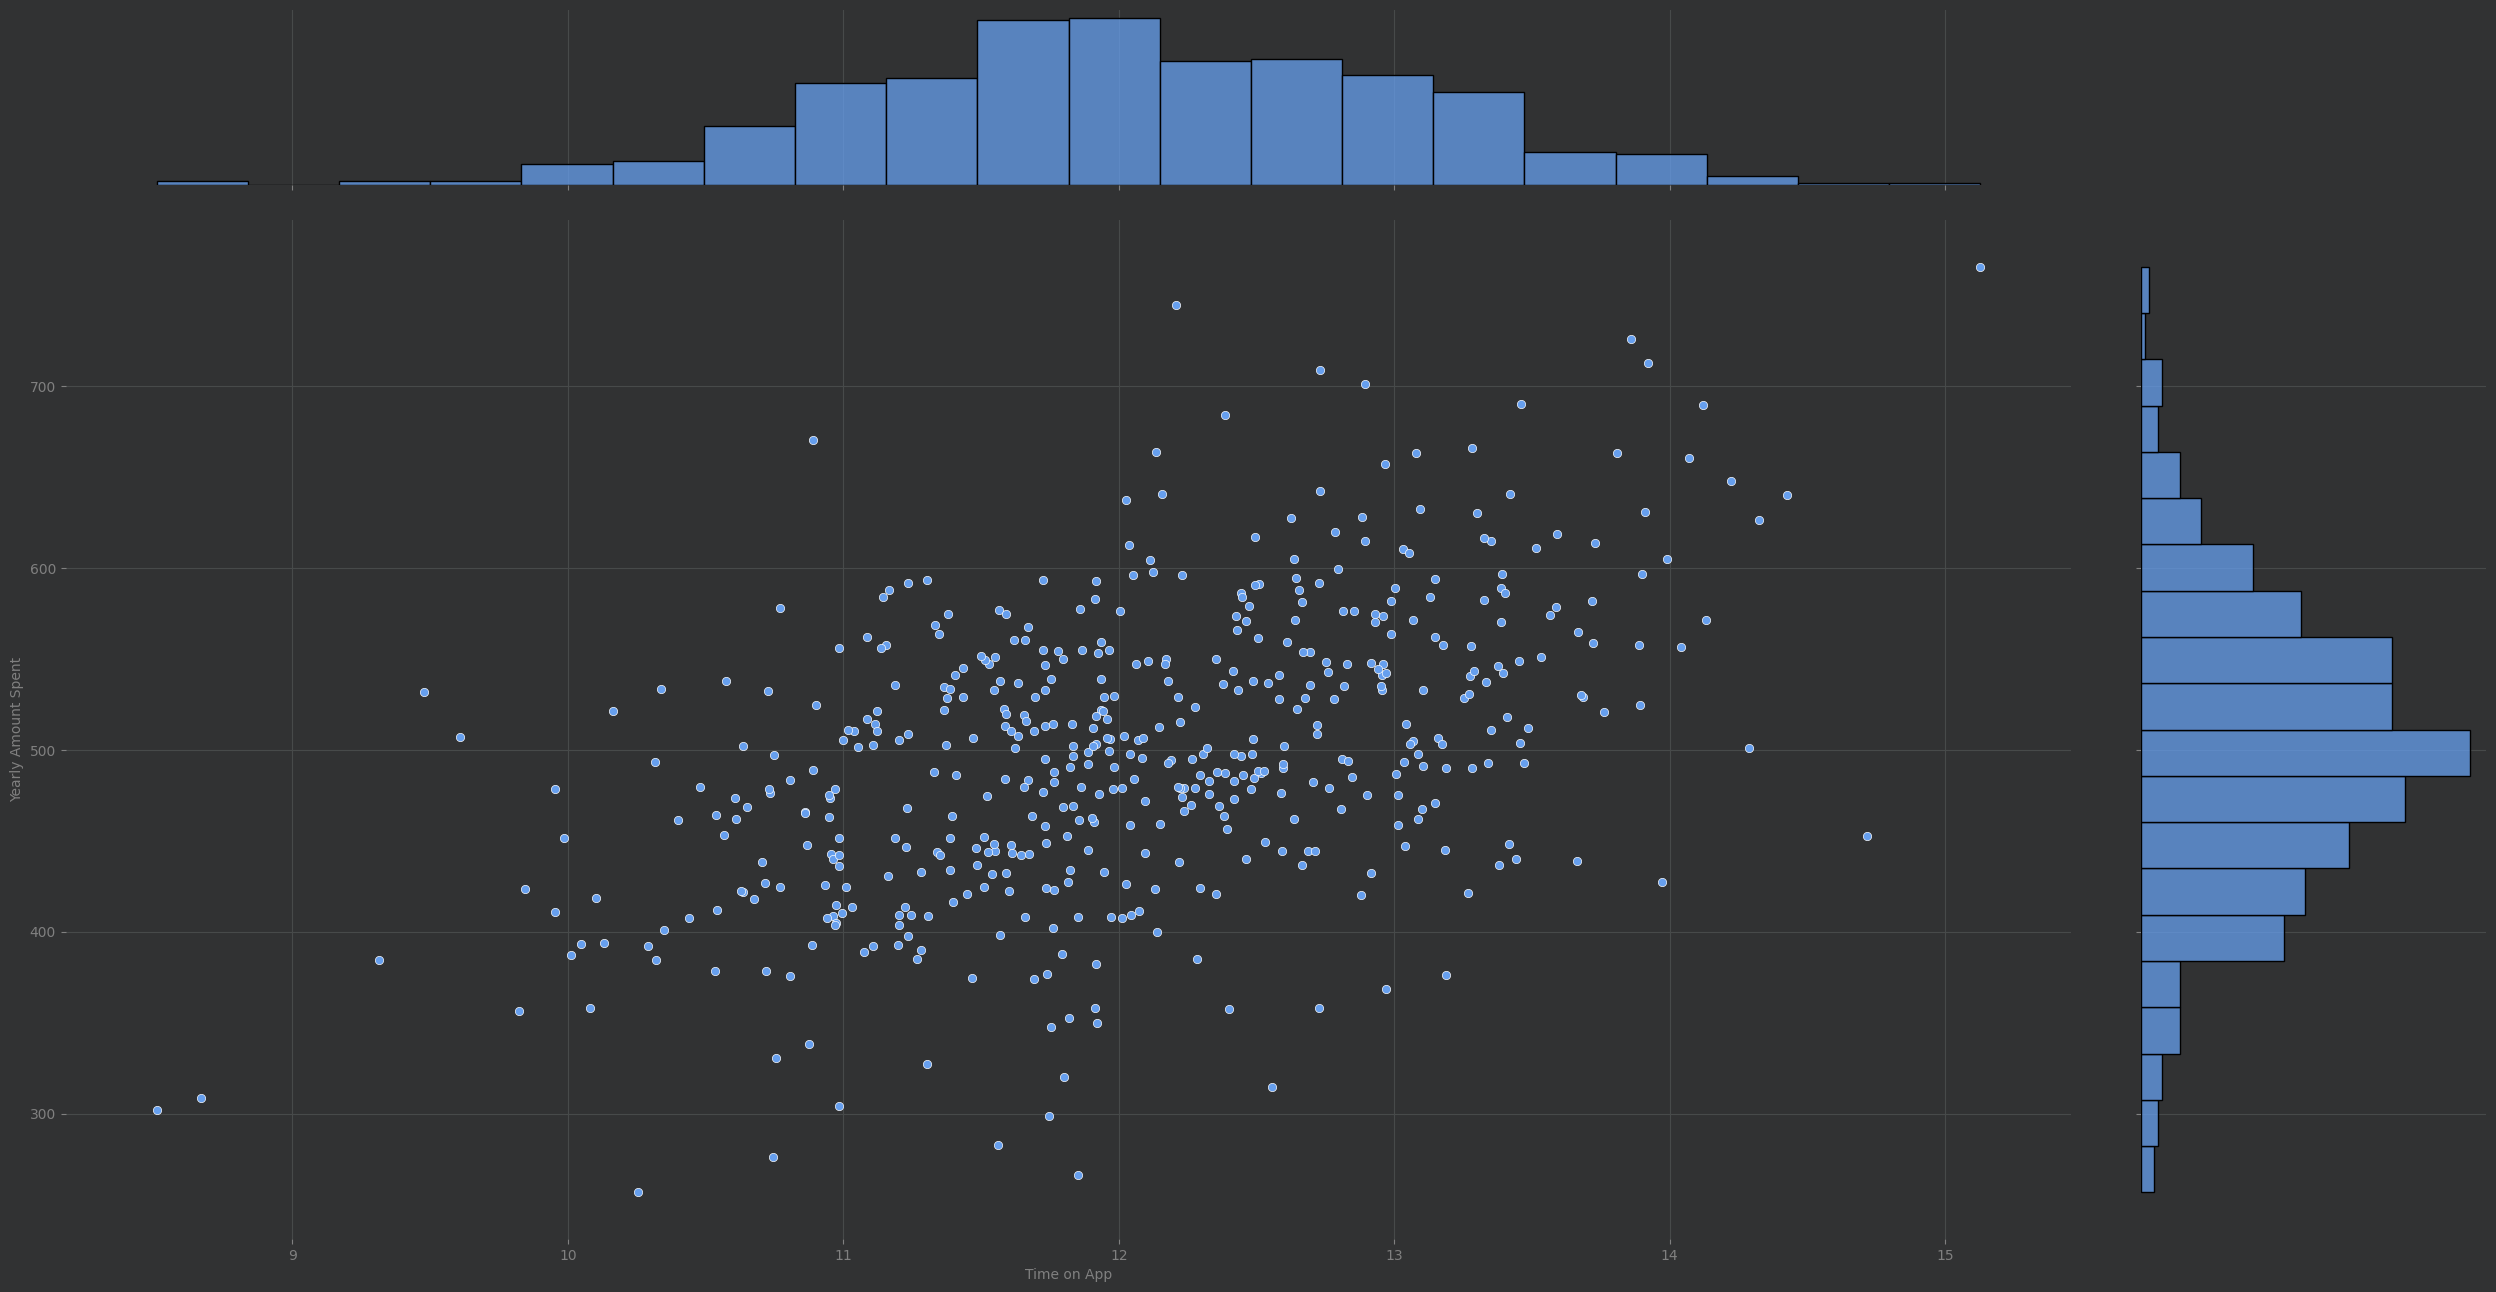

In [6]:
joint_plot = sns.jointplot(x=df['Time on App'], y=df['Yearly Amount Spent'])
fig = joint_plot.fig
fig.set_size_inches(28, 14)
plt.show()

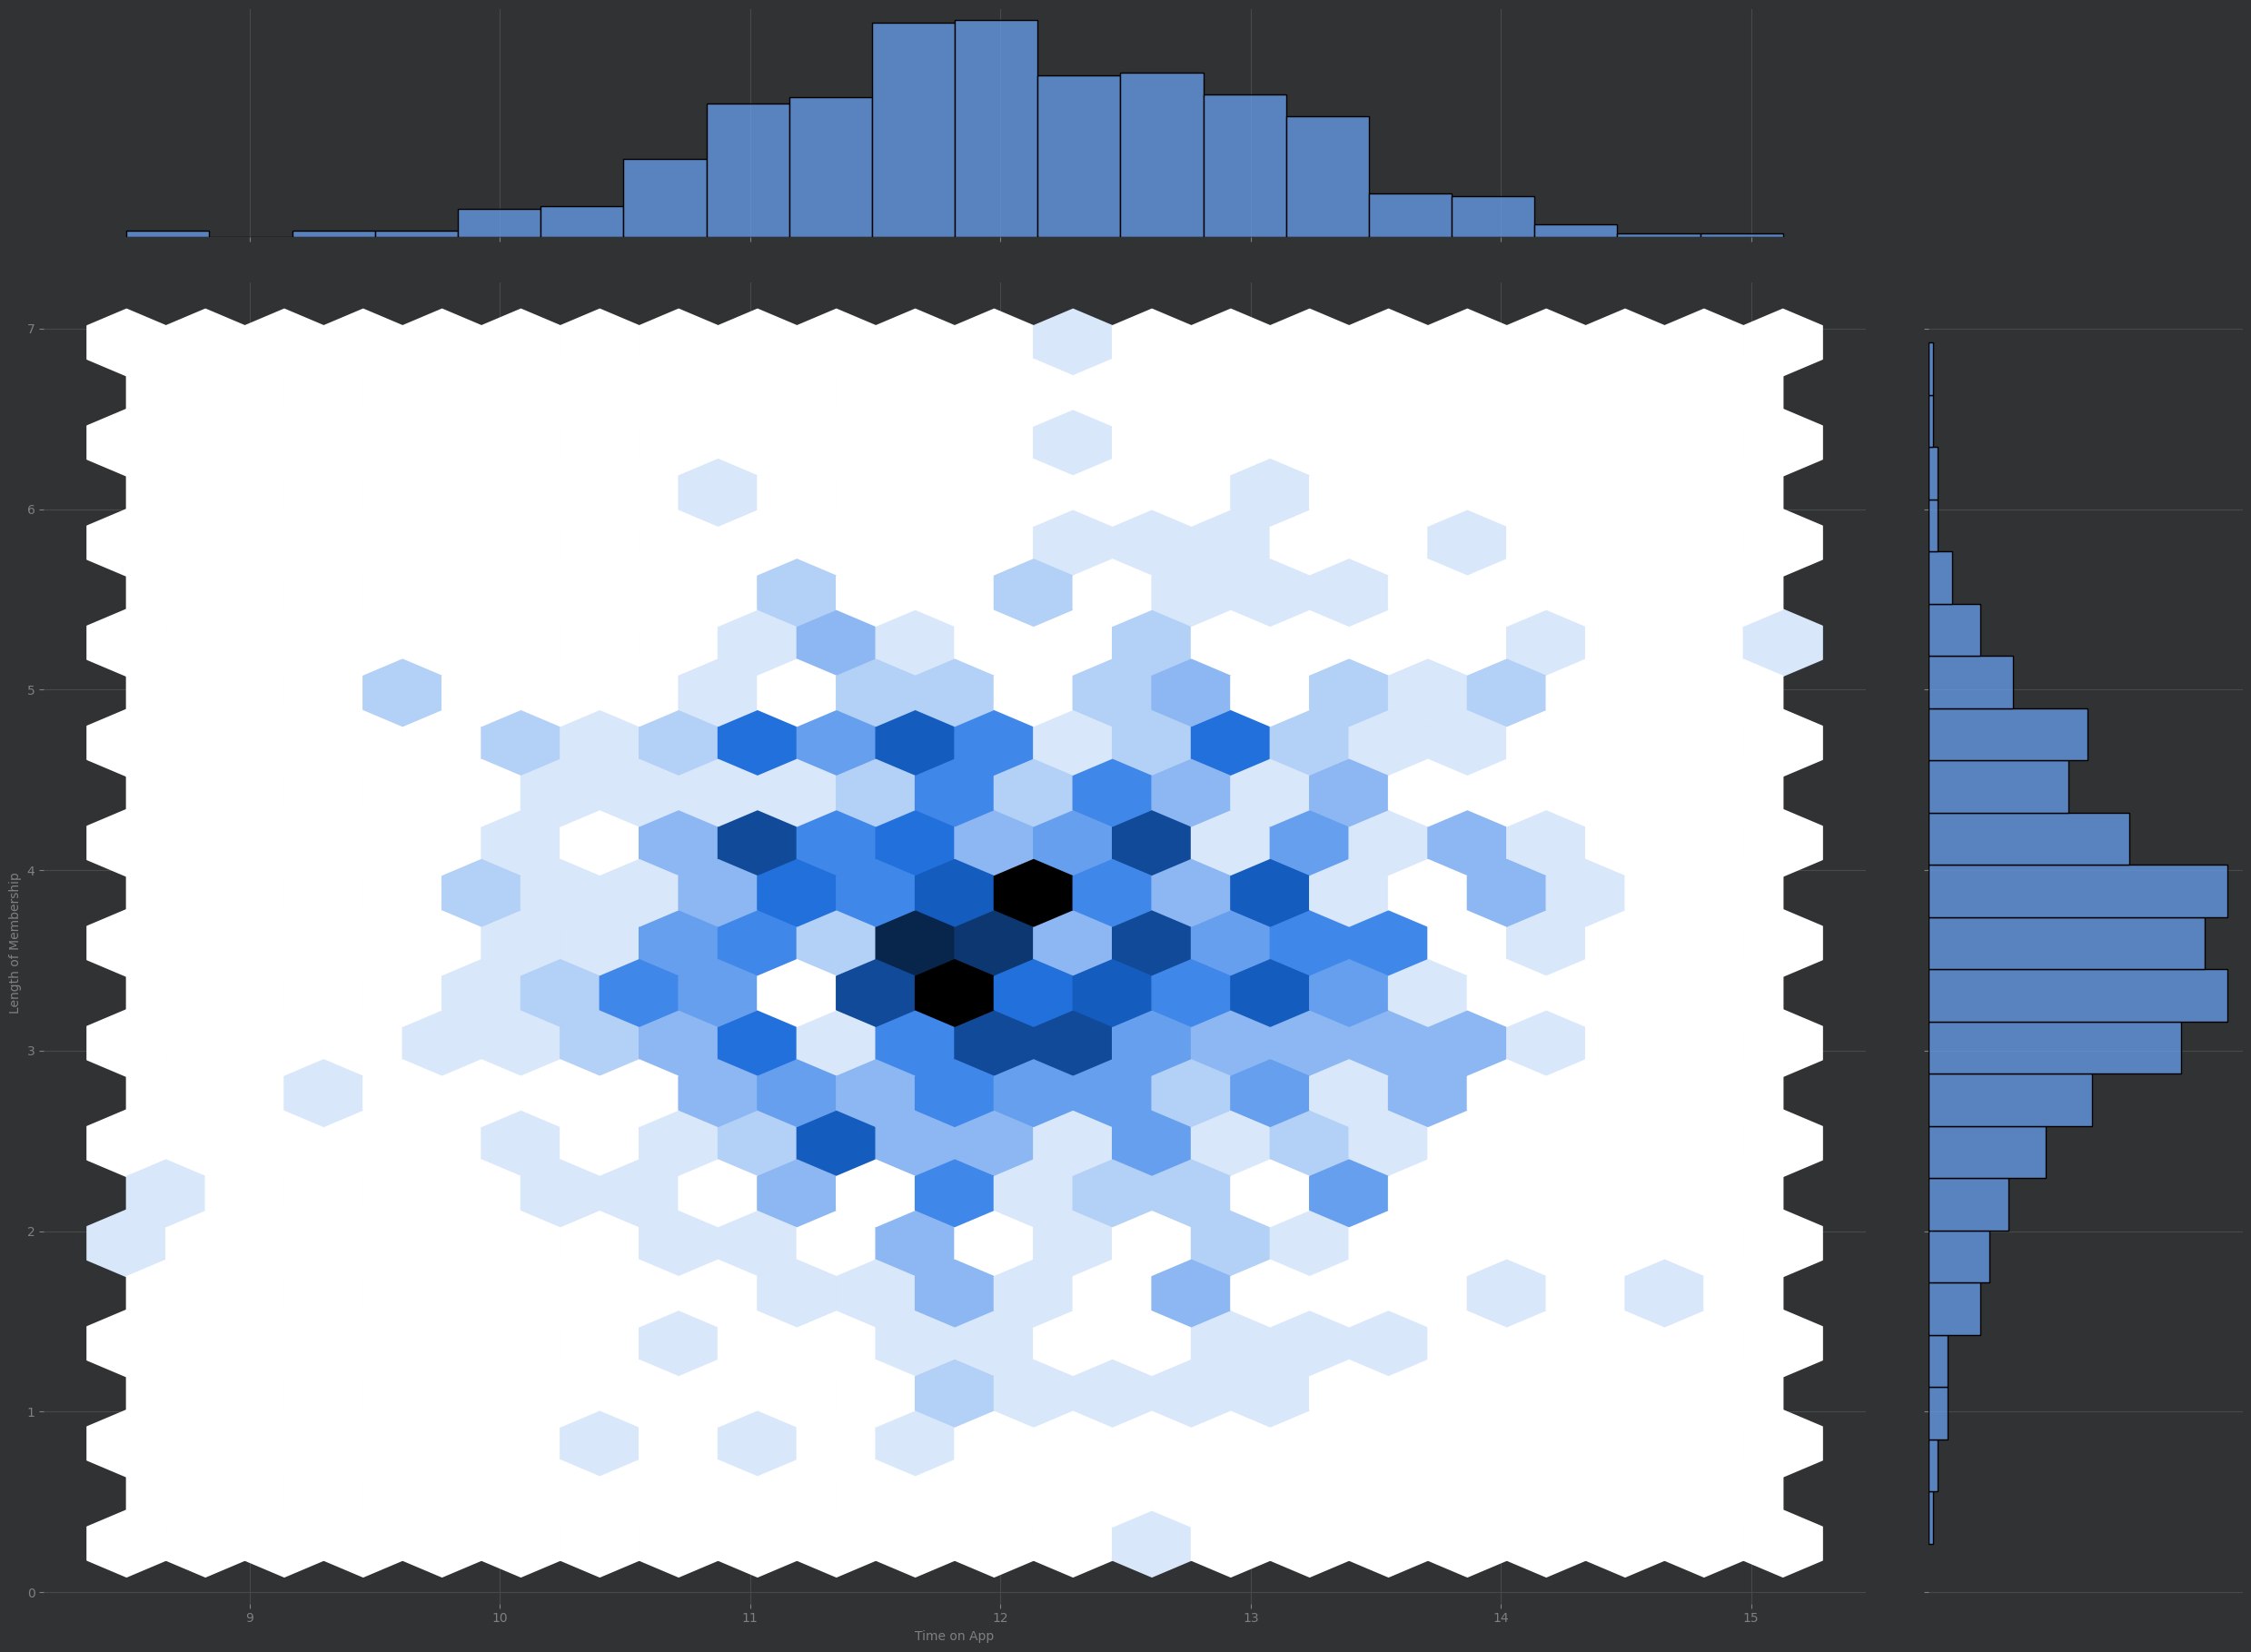

In [7]:
hex_plot = sns.jointplot(x=df['Time on App'], y=df['Length of Membership'], kind="hex")
fig = hex_plot.fig
fig.set_size_inches(28, 20)
plt.show()

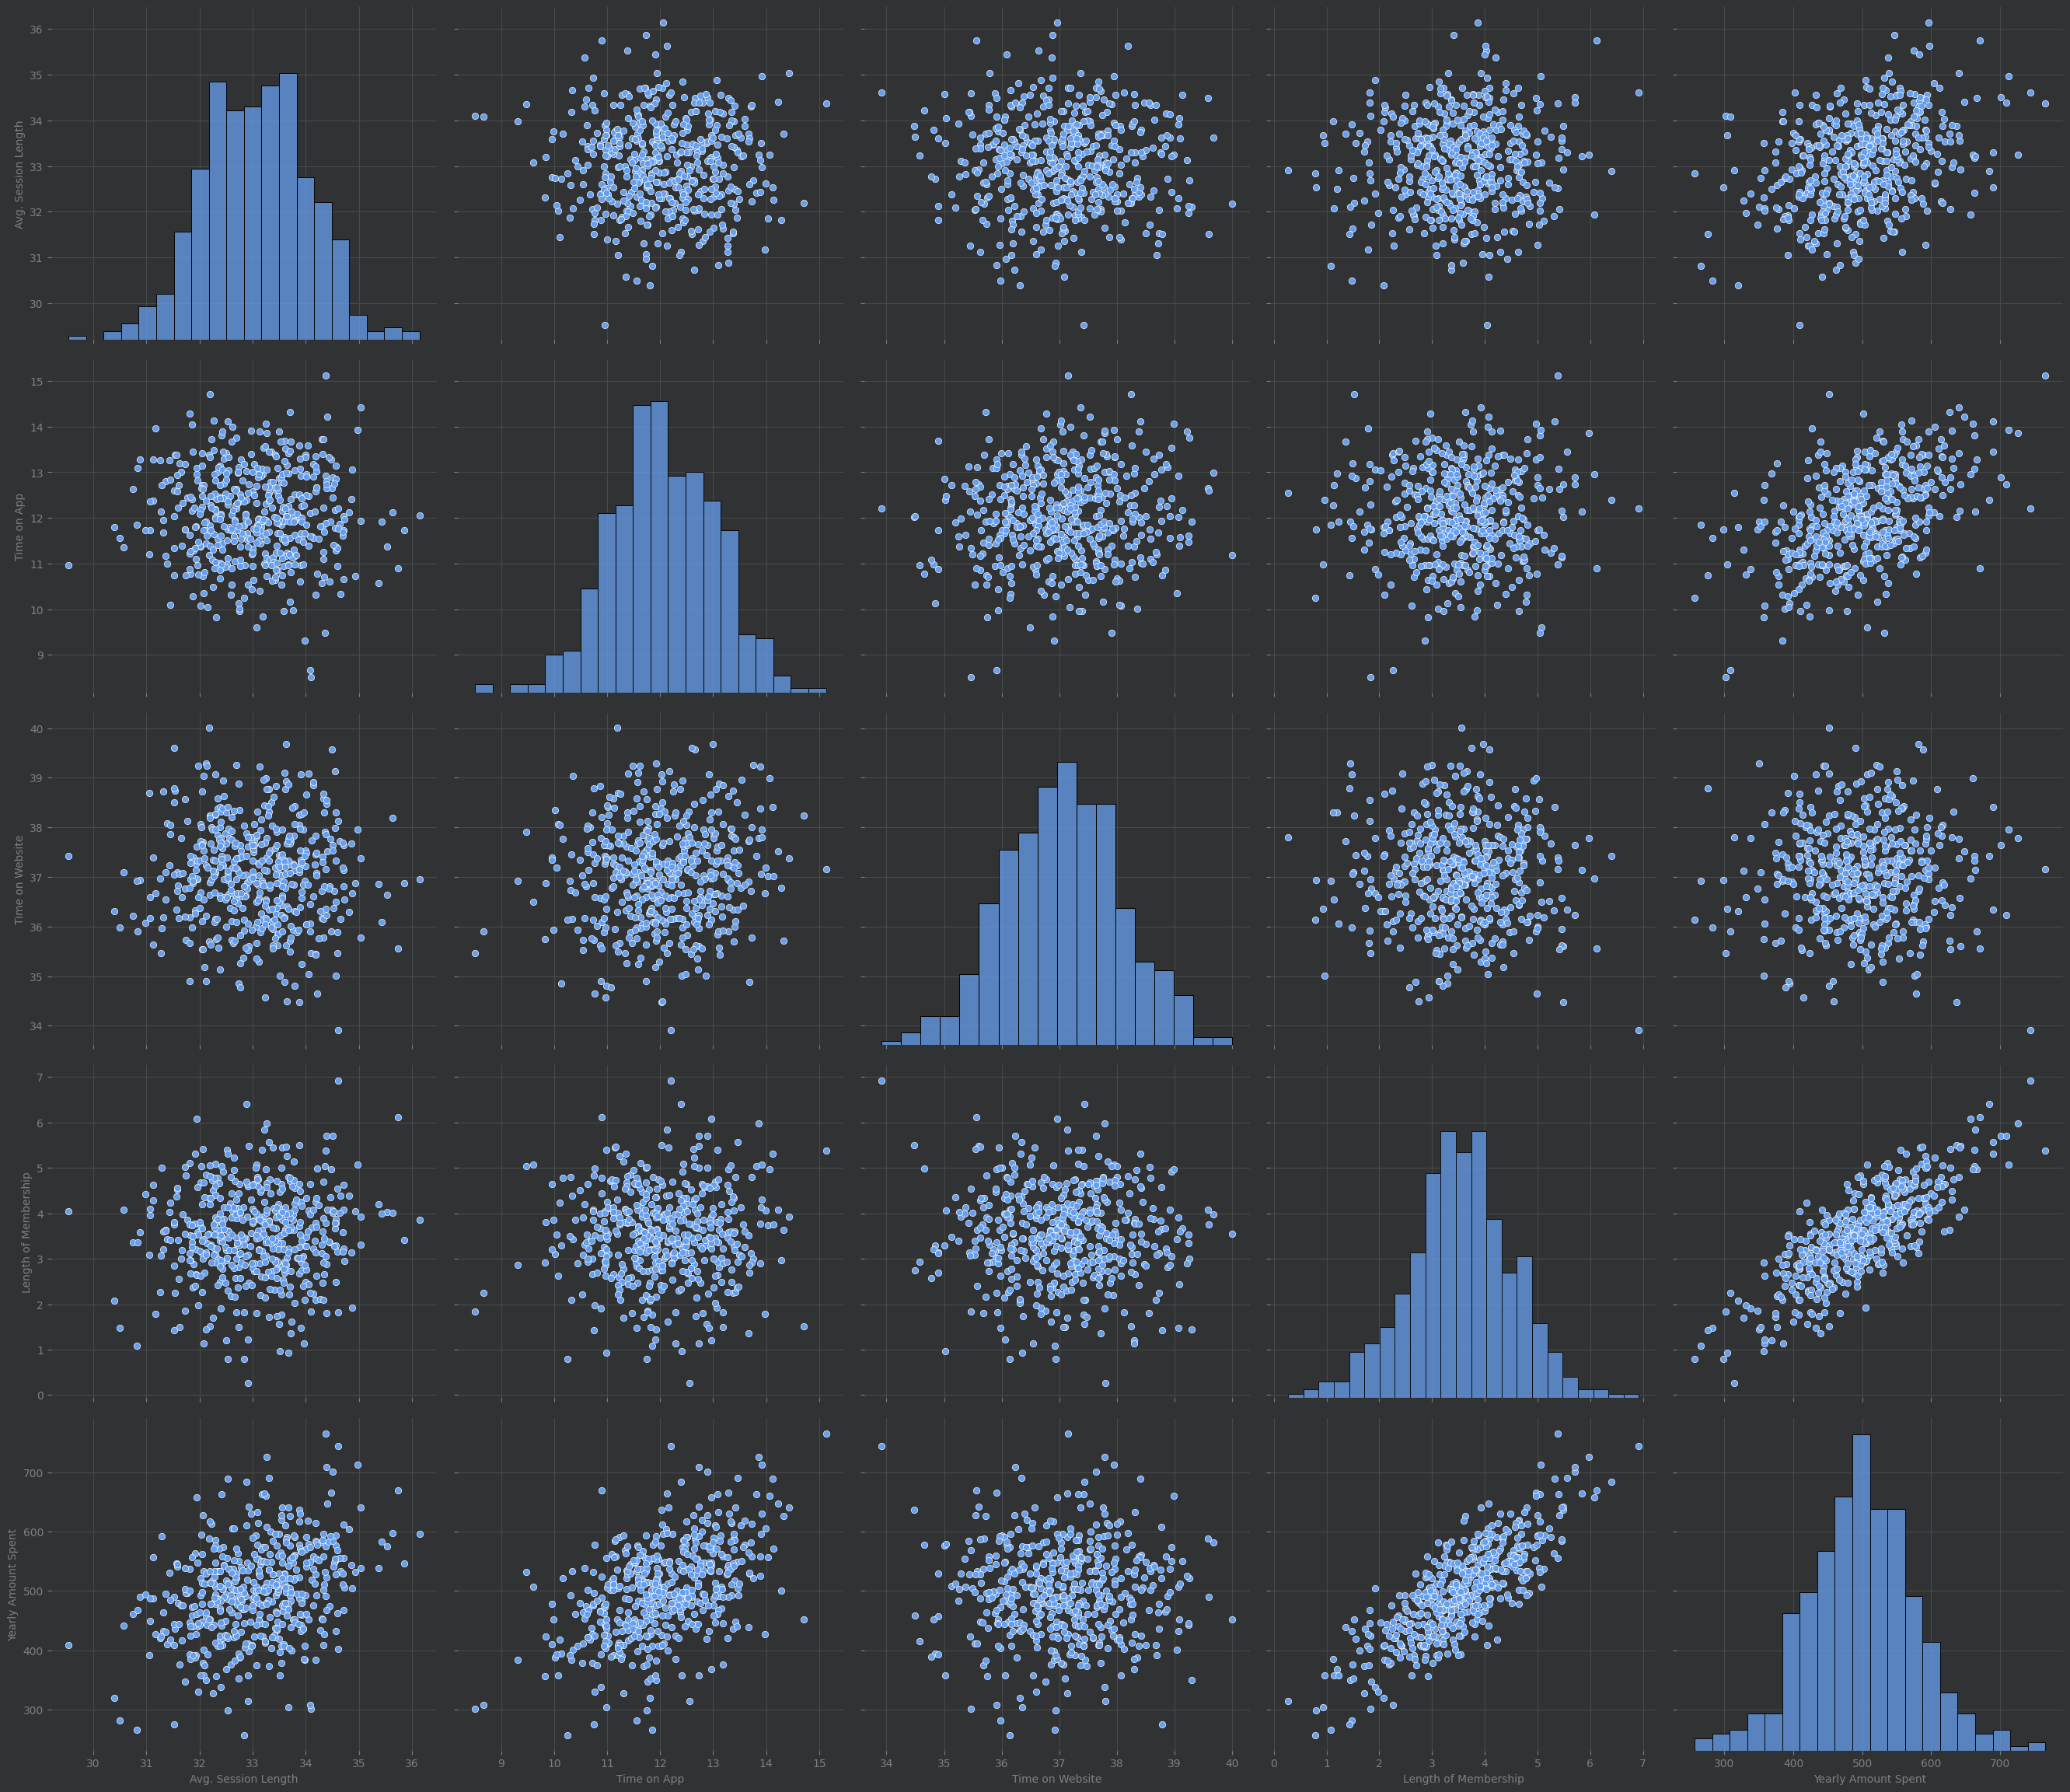

In [9]:
pair_plot = sns.pairplot(data=df)
fig = pair_plot.fig
fig.set_size_inches(28, 24)
plt.show()

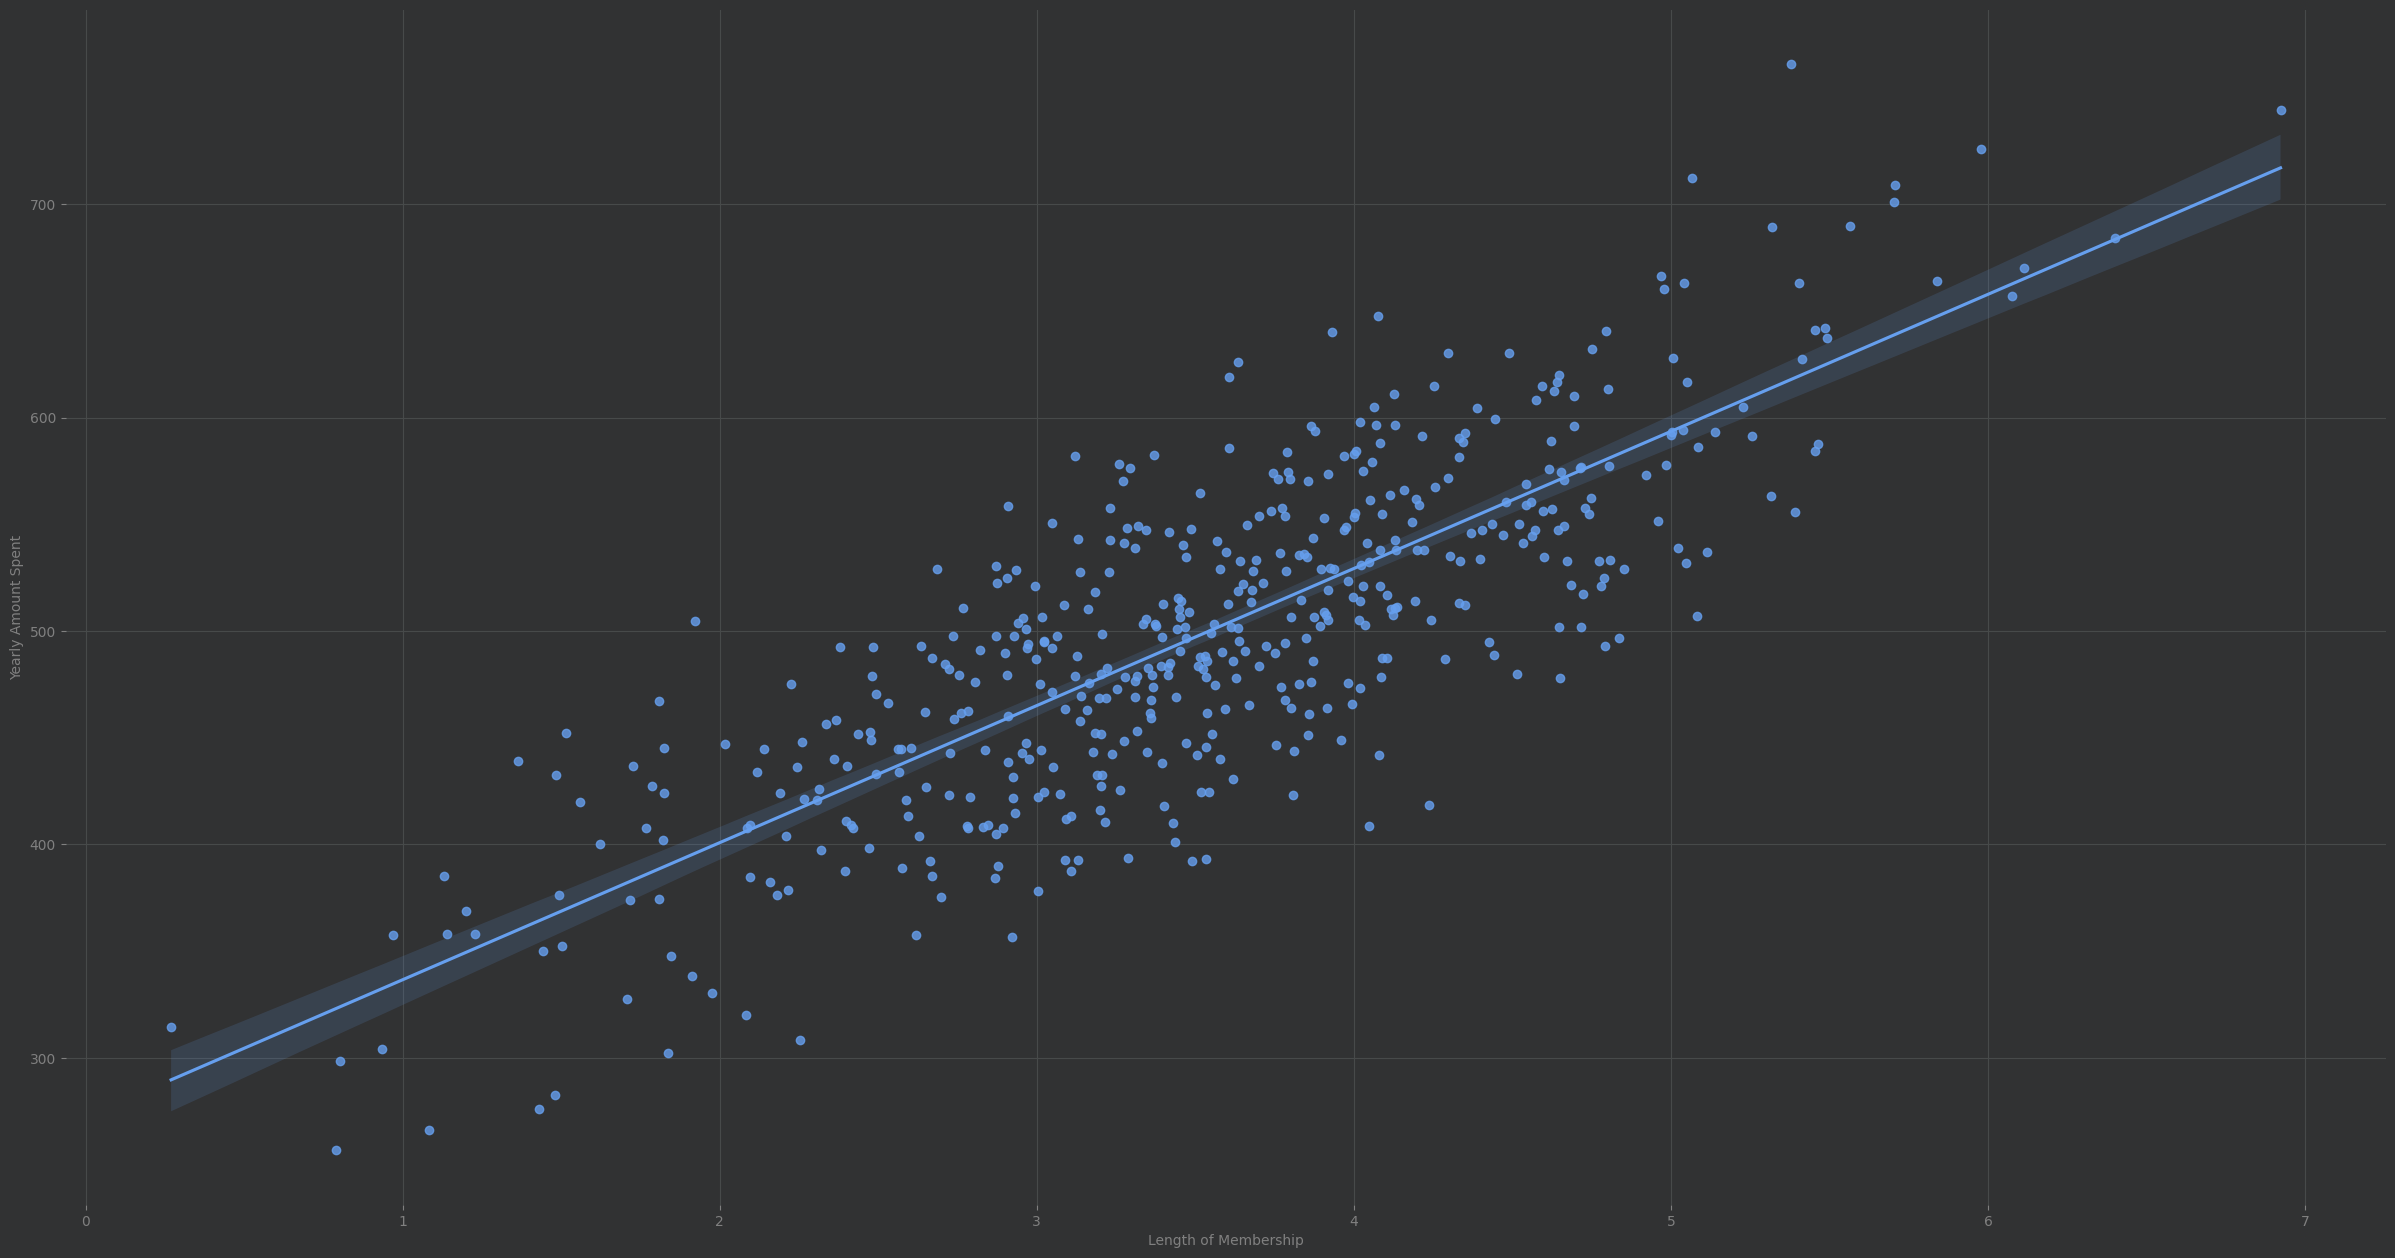

In [10]:
lm_plot = sns.lmplot(data=df, x='Length of Membership', y='Yearly Amount Spent')
fig = lm_plot.fig
fig.set_size_inches(28, 14)
plt.show()

# Linear Regression Model

In [11]:
# train and test data, y is what we want to predict
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]
y = df['Yearly Amount Spent']

In [12]:
# split into train and test data, 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
len(X_train), len(X_test), len(y_train), len(y_test)

(350, 150, 350, 150)

In [13]:
# train the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
# coef based on columns
cdf = pd.DataFrame(lm.coef_, X.columns, columns=["Coef"])
cdf

,Coef
Avg. Session Length,-3.383629e-14
Time on App,-3.030909e-14
Time on Website,1.232087e-15
Length of Membership,-5.860937e-14
Yearly Amount Spent,1.000000e+00


In [15]:
# predict using the model
predictions = lm.predict(X_test)
predictions

array([449.07031944, 482.60246733, 374.26967454, 513.15311185,
       502.77107457, 461.7807422 , 466.42119882, 327.37795259,
       528.22380937, 657.01992394, 571.47103412, 523.63393514,
       546.55666686, 467.4278485 , 439.89128048, 445.06218551,
       553.99467359, 403.7669021 , 595.80381888, 490.73863214,
       712.39632681, 502.0925279 , 398.16346853, 570.45172591,
       549.86059046, 392.99225591, 419.93877484, 407.65717876,
       521.14295181, 463.74598112, 556.29814117, 506.54730705,
       514.33655827, 476.76672415, 418.6027421 , 403.81951983,
       506.13234244, 436.72055586, 558.94811239, 421.32663126,
       478.2621264 , 593.91500297, 632.12358814, 591.43773557,
       444.2859075 , 392.20493344, 558.42725718, 447.18764431,
       475.72506791, 420.73767324, 527.78299576, 421.96679419,
       576.02524413, 460.06127739, 452.627255  , 408.64035107,
       557.25268675, 298.76200786, 555.06839405, 486.0834255 ,
       488.78606109, 423.3083341 , 458.78113168, 574.41

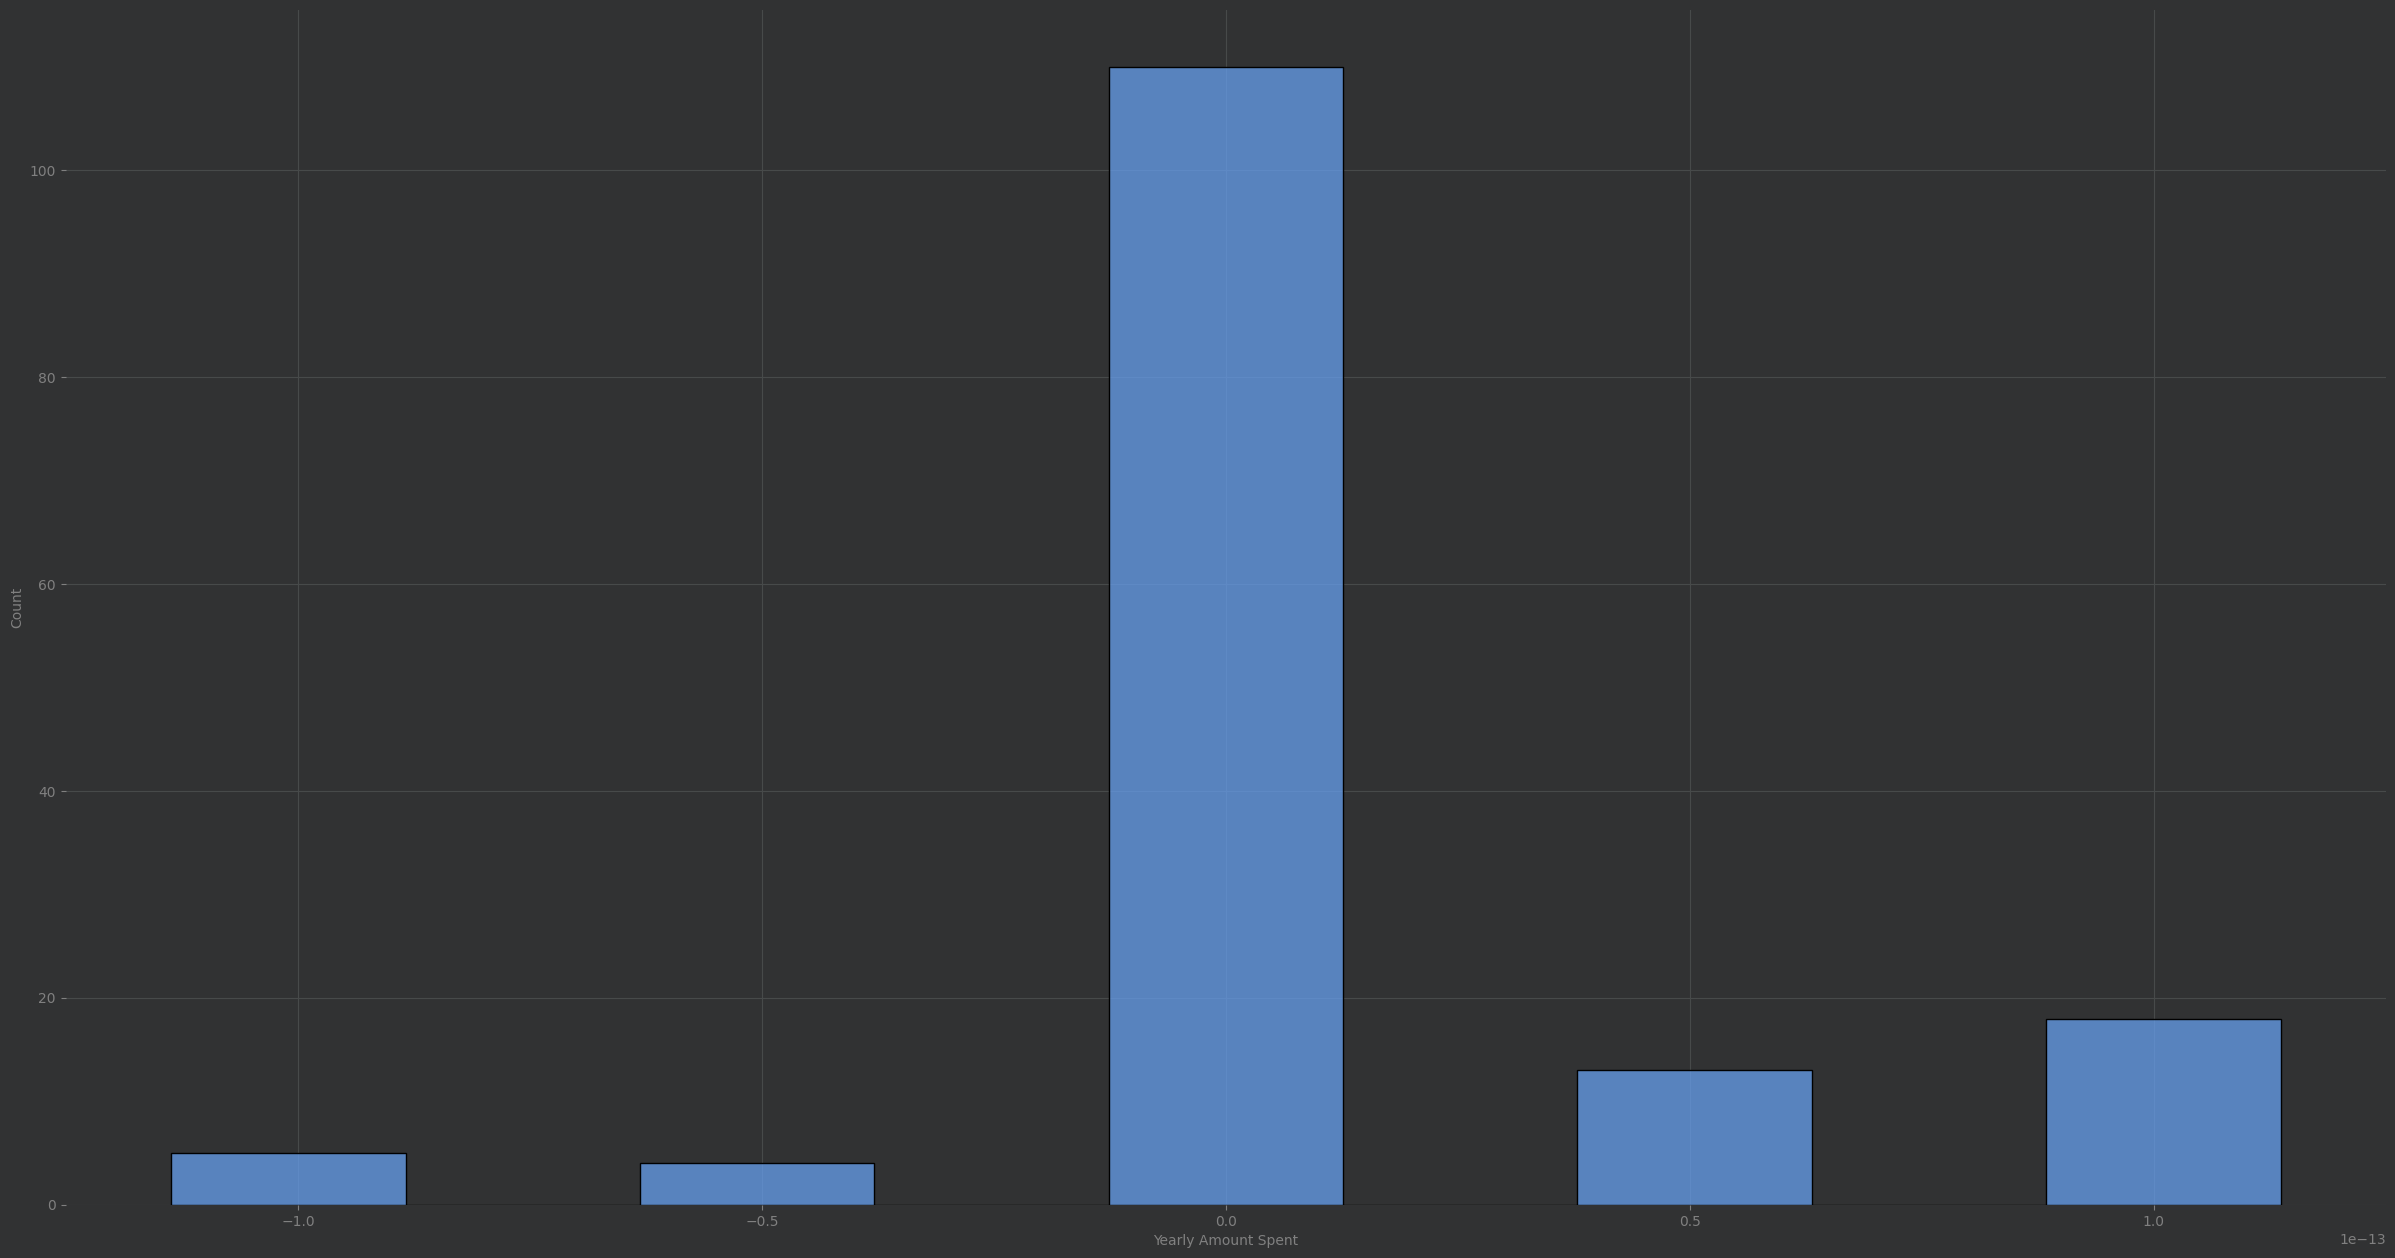

In [16]:
# not so good result for the use of this model
predict_plot = sns.displot((y_test - predictions))
fig = predict_plot.fig
fig.set_size_inches(28, 14)
plt.show()

In [17]:
# MAE metrics
metrics.mean_absolute_error(y_test, predictions)

2.3874235921539365e-14

In [18]:
# MSE metrics
metrics.mean_squared_error(y_test, predictions)

2.3479866345906255e-27

In [19]:
# RMSE metrics
np.sqrt(metrics.mean_squared_error(y_test, predictions))

4.845602784577606e-14

In [20]:
# Get the R squared, higher the result better the correlation
lm.score(X_test, y_test)

1.0